## Importing modules and data

In [2]:
#modules import
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#data import
df_2019 = pd.read_csv("C:/Users/pedro/Github/PetShop_Analysis/src/vendas_linha_petshop_2019.csv", delimiter=";", encoding='ISO-8859-1')
df_2020 = pd.read_csv("C:/Users/pedro/Github/PetShop_Analysis/src/vendas_linha_petshop_2020.csv", delimiter=";", encoding='ISO-8859-1')
df_2021 = pd.read_csv("C:/Users/pedro/Github/PetShop_Analysis/src/vendas_linha_petshop_2021.csv", delimiter=";", encoding='ISO-8859-1')
df_2022 = pd.read_csv("C:/Users/pedro/Github/PetShop_Analysis/src/vendas_linha_petshop_2022.csv", delimiter=";", encoding='ISO-8859-1')

In [4]:
#putting the dfs together into one df
df_geral = pd.concat([df_2019, df_2020, df_2021, df_2022])

Actual Data Types:

In [5]:
#visualizing the data type
df_geral.dtypes

order                   int64
country_region         object
product                object
value                  object
quantity               object
gross_total_value      object
data                   object
state                  object
paym_mode              object
distribution_center    object
order_taker            object
commission_value       object
net_profit             object
prod_category          object
dtype: object

### Converting 'object' into 'float64'


Now I'll adjust the data type, transforming it, where necessary, from object to float64 \
In this case, the columns that will receive this adjustment will be: quantity, gross_total_value, value, commission_value and net_profit \
In addition, we will replace the NaN values with 0

In [7]:
# Replaces empty values (' ') and NaN with 0
columns_to_replace = ['quantity', 'gross_total_value', 'value', 'commission_value', 'net_profit']
df_geral[columns_to_replace] = df_geral[columns_to_replace].replace([' ', np.nan], 0)

# Replaces comma with period and converts to float
for col in columns_to_replace:
    df_geral[col] = df_geral[col].astype(str).str.replace(',', '.').astype(float)

# Converts the date column to the datetime type
df_geral['data'] = pd.to_datetime(df_geral['data'], dayfirst=True)

# Verify data types
df_geral.dtypes

order                           int64
country_region                 object
product                        object
value                         float64
quantity                      float64
gross_total_value             float64
data                   datetime64[ns]
state                          object
paym_mode                      object
distribution_center            object
order_taker                    object
commission_value              float64
net_profit                    float64
prod_category                  object
dtype: object

In [8]:
df_geral.head(5)

,order,country_region,product,value,quantity,gross_total_value,data,state,paym_mode,distribution_center,order_taker,commission_value,net_profit,prod_category
0,1,Norte,Biscoito True Champion 300g,22.0,2.0,44.0,2019-06-13,Acre,Dinheiro,Rapid Pink,Carlos,0.44,17.6,Alimentaï¿½ï¿½o
1,2,Norte,Biscoito True Champion 300g,21.0,2.0,42.0,2019-01-03,Amapï¿½,Pix,Rapid Pink,Maria Linda,0.42,16.8,Alimentaï¿½ï¿½o
2,3,Norte,Biscoito True Champion 300g,22.0,0.0,44.0,2019-01-18,Parï¿½,Boleto Bancï¿½rio,Rapid Pink,Julia,0.88,35.2,Alimentaï¿½ï¿½o
3,4,Norte,Biscoito True Champion 300g,19.0,4.0,88.0,2019-08-19,Rondï¿½nia,Boleto Bancï¿½rio,Rapid Pink,Yuri,0.76,30.4,Alimentaï¿½ï¿½o
4,5,Norte,Biscoito True Champion 300g,22.0,2.0,44.0,2019-10-18,Tocantins,Cartï¿½o Crï¿½dito,Rapid Pink,Dolores,0.44,17.6,Alimentaï¿½ï¿½o


Now we realize that the *Missings*, known as NaN, have been transformed into numerical values of type float64, i.e. they have become **'0.0'**



## Applying our calculation to discover the correct quantities of MISSING values

Missing values have been identified and adjusted, comprising the columns quantity, total_gross_value, value, commission_value and net_profit, so we will adjust the values that need it. Ex.: \
In the Quantity column, line 3, the information was not recorded, so it appeared as NaN, if the 'gross_total_value' column records 44 reais, and the 'value' column records 22 reais, we will perform a division account to capture the quantity sold, so the correct quantity for this line that we are observing is '2.0' (44/22). \
\
This adjustment will occur for all the columns listed above.

**For any value of 0 stored in the 'quantity' column, we will perform a division between the 'gross_total_value' and the 'value',
adding the result back to the 'qquantity' column; this operation will include values per row.**

In [9]:
df_geral['quantity'] = np.where((df_geral['quantity'] == 0),
                                 df_geral['gross_total_value'] / df_geral['value'],
                                  df_geral['quantity'])

**For any value of 0 stored in the 'value' column, we will perform a division between the 'gross_total_value' and the 'quantity',
adding the result back to the 'value' column; this operation will include values per row.**

In [10]:
df_geral['value'] = np.where((df_geral['value'] == 0),
                                 df_geral['gross_total_value'] / df_geral['quantity'],
                                  df_geral['value'])

**For any value of 0 stored in the 'gross_total_value' column, we will perform a multiplication between the 'value' and the 'quantity',
adding the result back to the 'gross_total_value' column; this operation will include values per row.**

In [11]:
df_geral['gross_total_value'] = np.where((df_geral['gross_total_value'] == 0),
                                 df_geral['value'] * df_geral['quantity'],
                                  df_geral['gross_total_value'])

We did our calculation for all the column values that were '0.0' with the codes above, resulting in a new DataFrame:

In [12]:
df_geral.head(5)

,order,country_region,product,value,quantity,gross_total_value,data,state,paym_mode,distribution_center,order_taker,commission_value,net_profit,prod_category
0,1,Norte,Biscoito True Champion 300g,22.0,2.0,44.0,2019-06-13,Acre,Dinheiro,Rapid Pink,Carlos,0.44,17.6,Alimentaï¿½ï¿½o
1,2,Norte,Biscoito True Champion 300g,21.0,2.0,42.0,2019-01-03,Amapï¿½,Pix,Rapid Pink,Maria Linda,0.42,16.8,Alimentaï¿½ï¿½o
2,3,Norte,Biscoito True Champion 300g,22.0,2.0,44.0,2019-01-18,Parï¿½,Boleto Bancï¿½rio,Rapid Pink,Julia,0.88,35.2,Alimentaï¿½ï¿½o
3,4,Norte,Biscoito True Champion 300g,19.0,4.0,88.0,2019-08-19,Rondï¿½nia,Boleto Bancï¿½rio,Rapid Pink,Yuri,0.76,30.4,Alimentaï¿½ï¿½o
4,5,Norte,Biscoito True Champion 300g,22.0,2.0,44.0,2019-10-18,Tocantins,Cartï¿½o Crï¿½dito,Rapid Pink,Dolores,0.44,17.6,Alimentaï¿½ï¿½o


## Observando se existe valores outliers

Nesse tópico de análise, iremos observar todas as colunas, através de gráficos, para identificar os outliers presentes nelas.

### Para coluna 'valor':

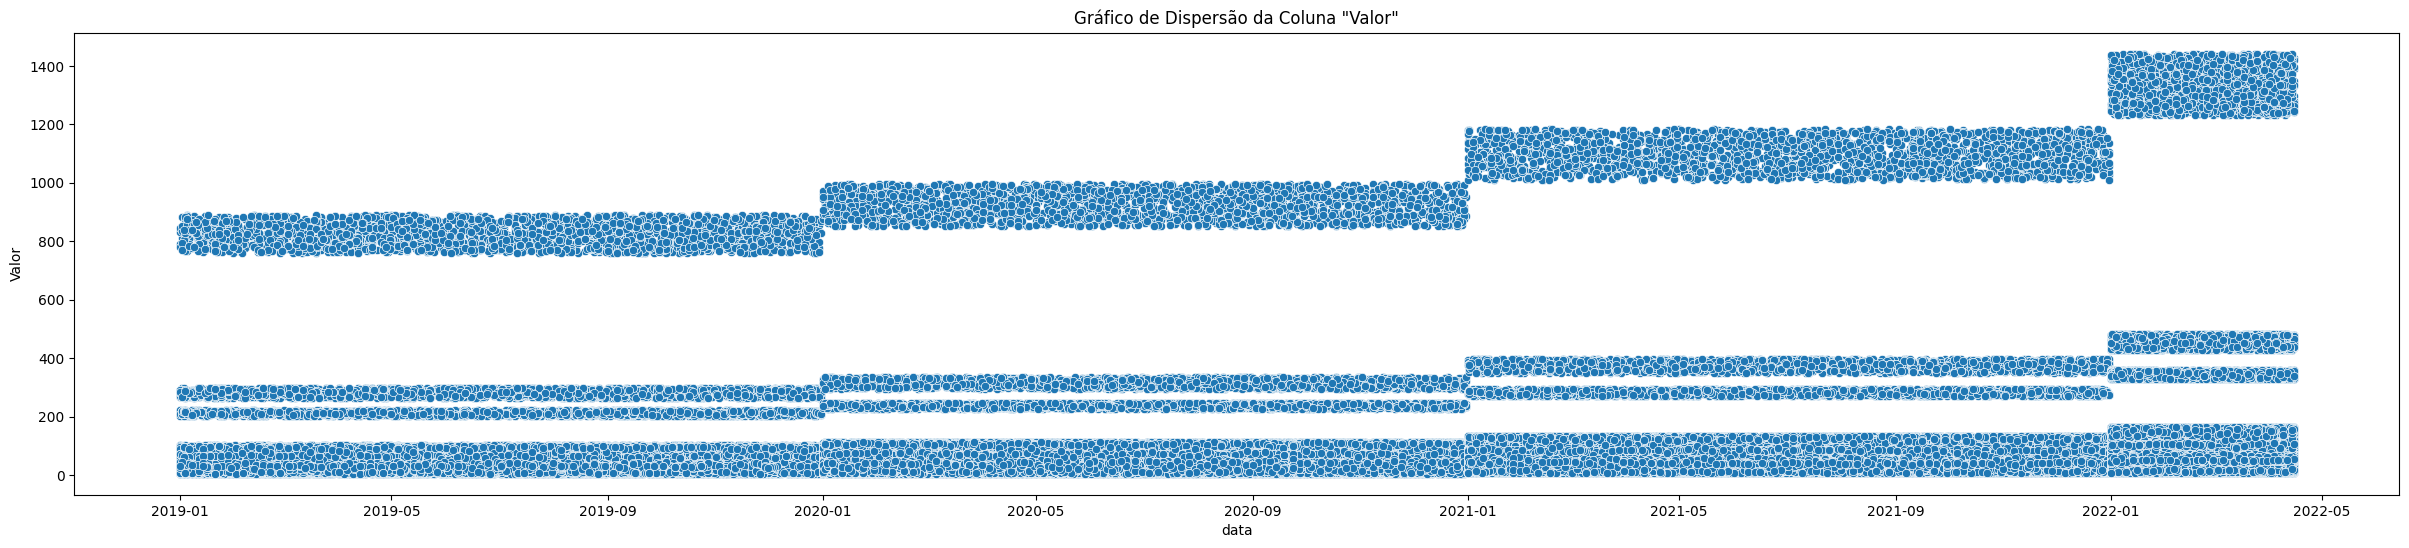

In [28]:
# Gráfico dispersão coluna VALOR
plt.figure(figsize=(30, 6))
sns.scatterplot(x=df_geral['data'], y=df_geral['valor'])
plt.title('Gráfico de Dispersão da Coluna "Valor"')
plt.xlabel('data')
plt.ylabel('Valor')
plt.show()

### Para coluna 'valor_total_bruto':

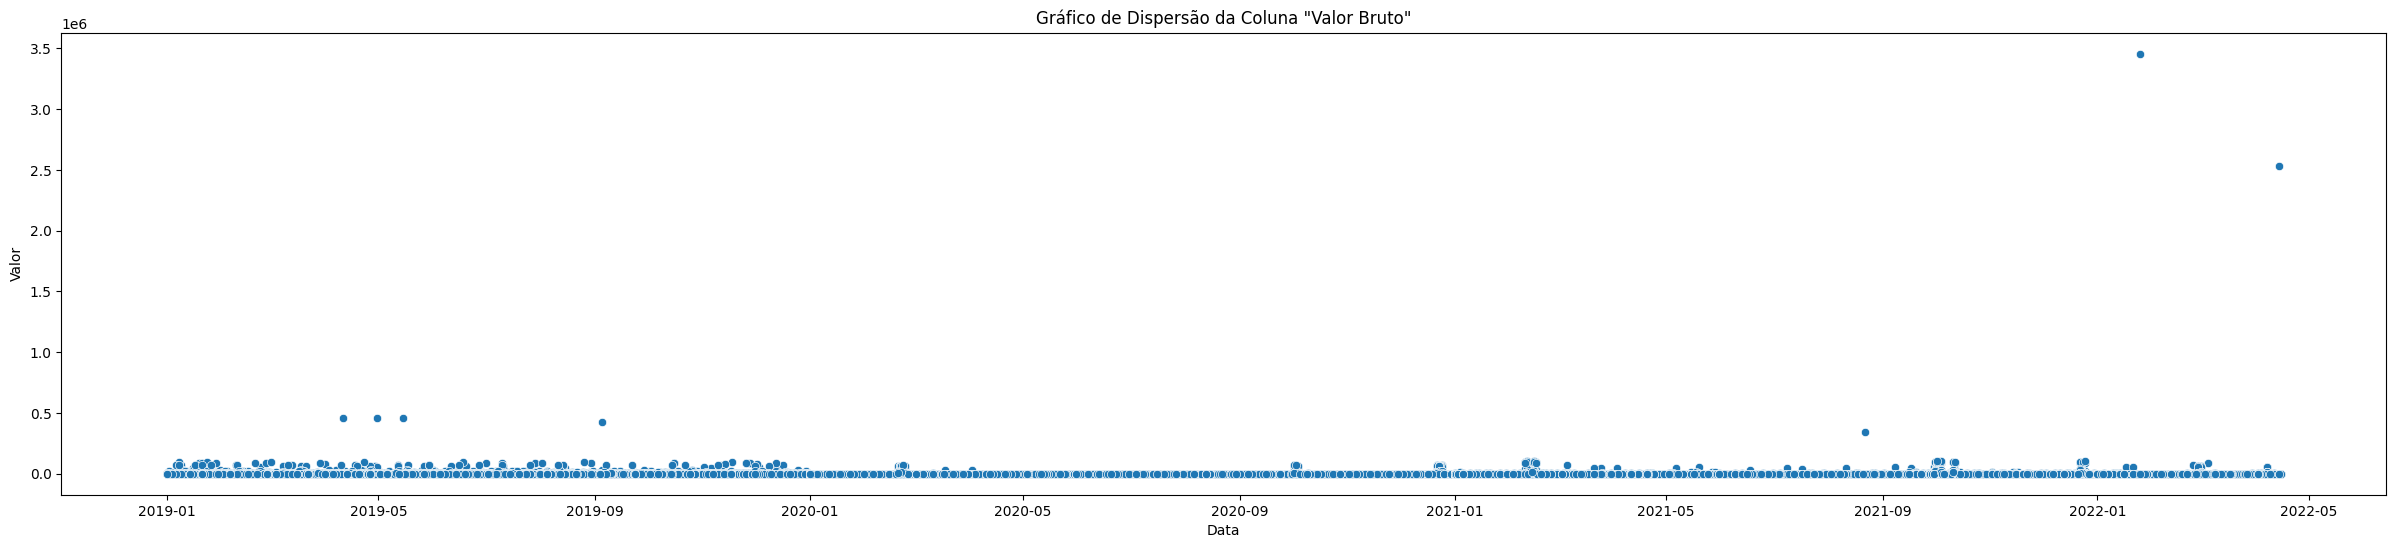

In [29]:
# Gráfico dispersão coluna VALOR_BRUTO
plt.figure(figsize=(30, 6))
sns.scatterplot(x=df_geral["data"], y=df_geral['valor_total_bruto'])
plt.title('Gráfico de Dispersão da Coluna "Valor Bruto"')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()

### Para coluna 'valor_comissao':

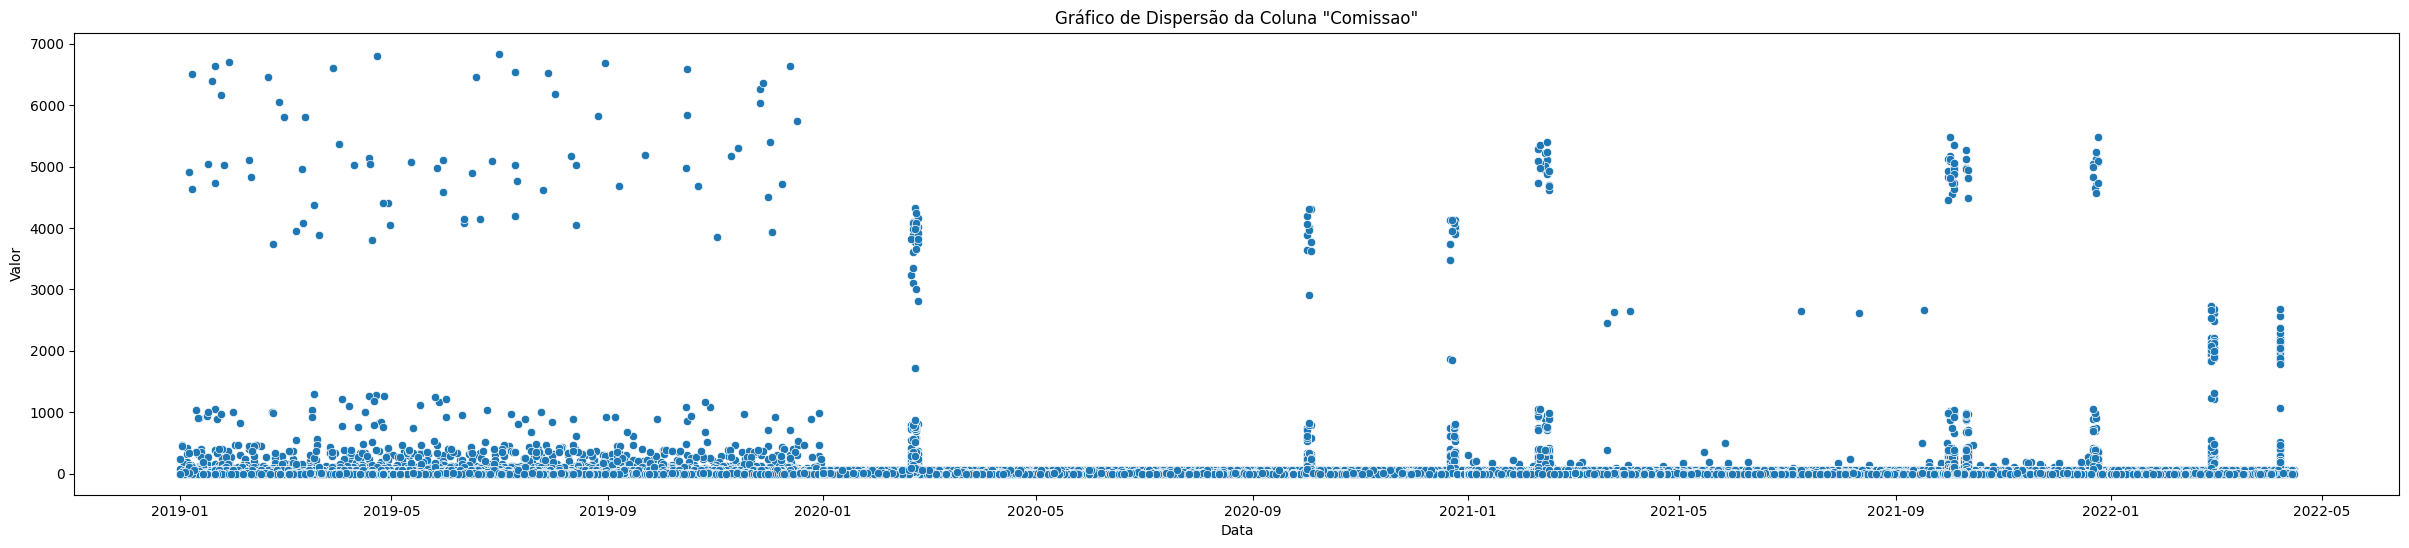

In [30]:
# Gráfico dispersão coluna VALOR_COMISSAO
plt.figure(figsize=(30, 6))
sns.scatterplot(x=df_geral["data"], y=df_geral['valor_comissao'])
plt.title('Gráfico de Dispersão da Coluna "Comissao"')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()

### Para coluna 'lucro_liquido':

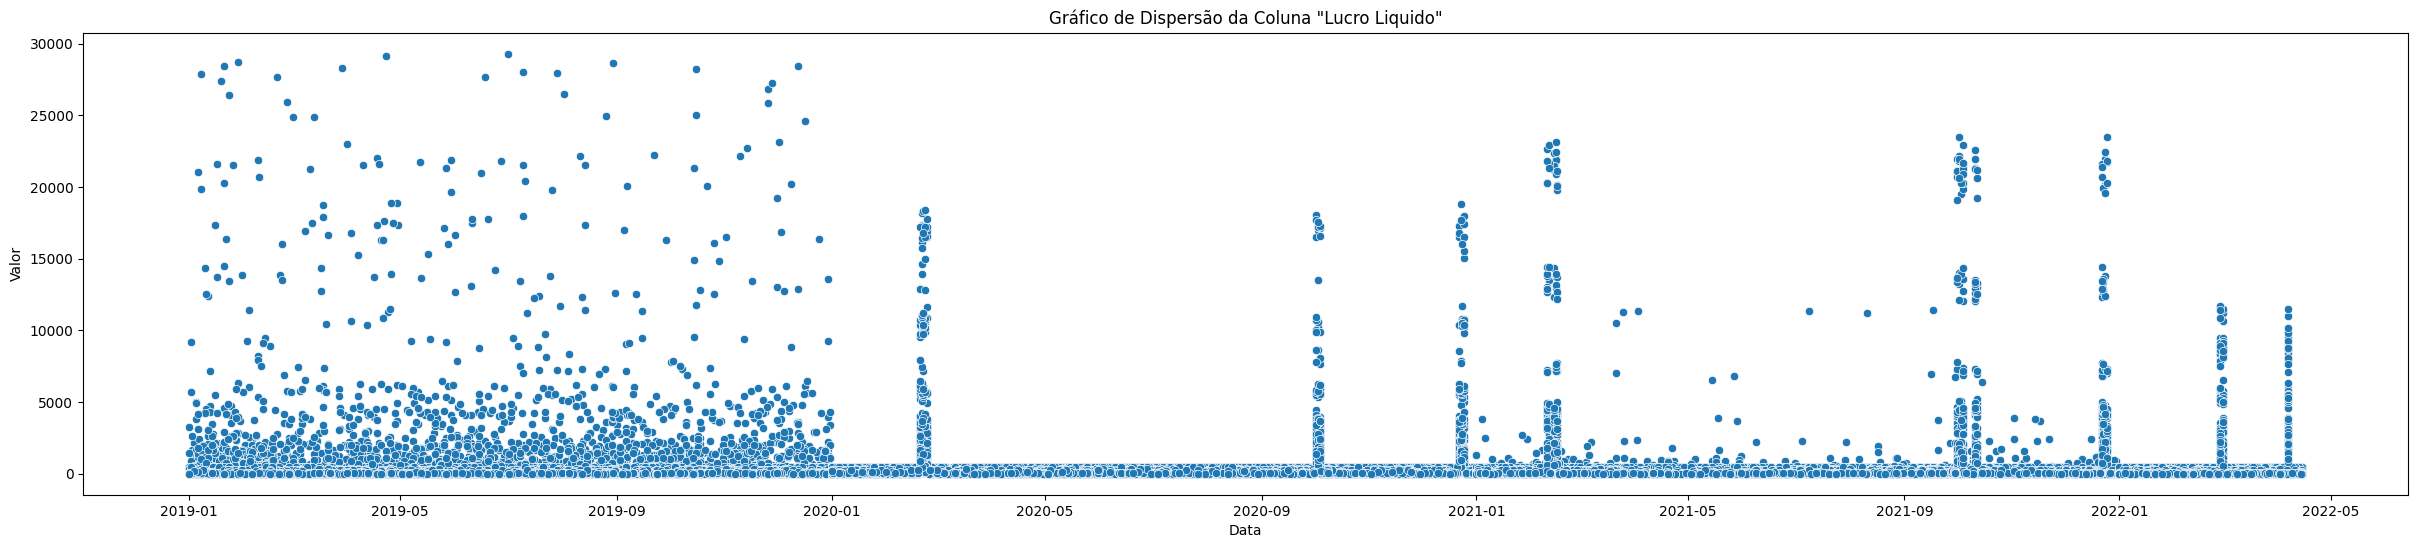

In [31]:
# Gráfico dispersão coluna LUCRO_LIQUIDO
plt.figure(figsize=(30, 6))
sns.scatterplot(x=df_geral["data"], y=df_geral['lucro_liquido'])
plt.title('Gráfico de Dispersão da Coluna "Lucro Liquido"')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()

### Para coluna 'quantidade':

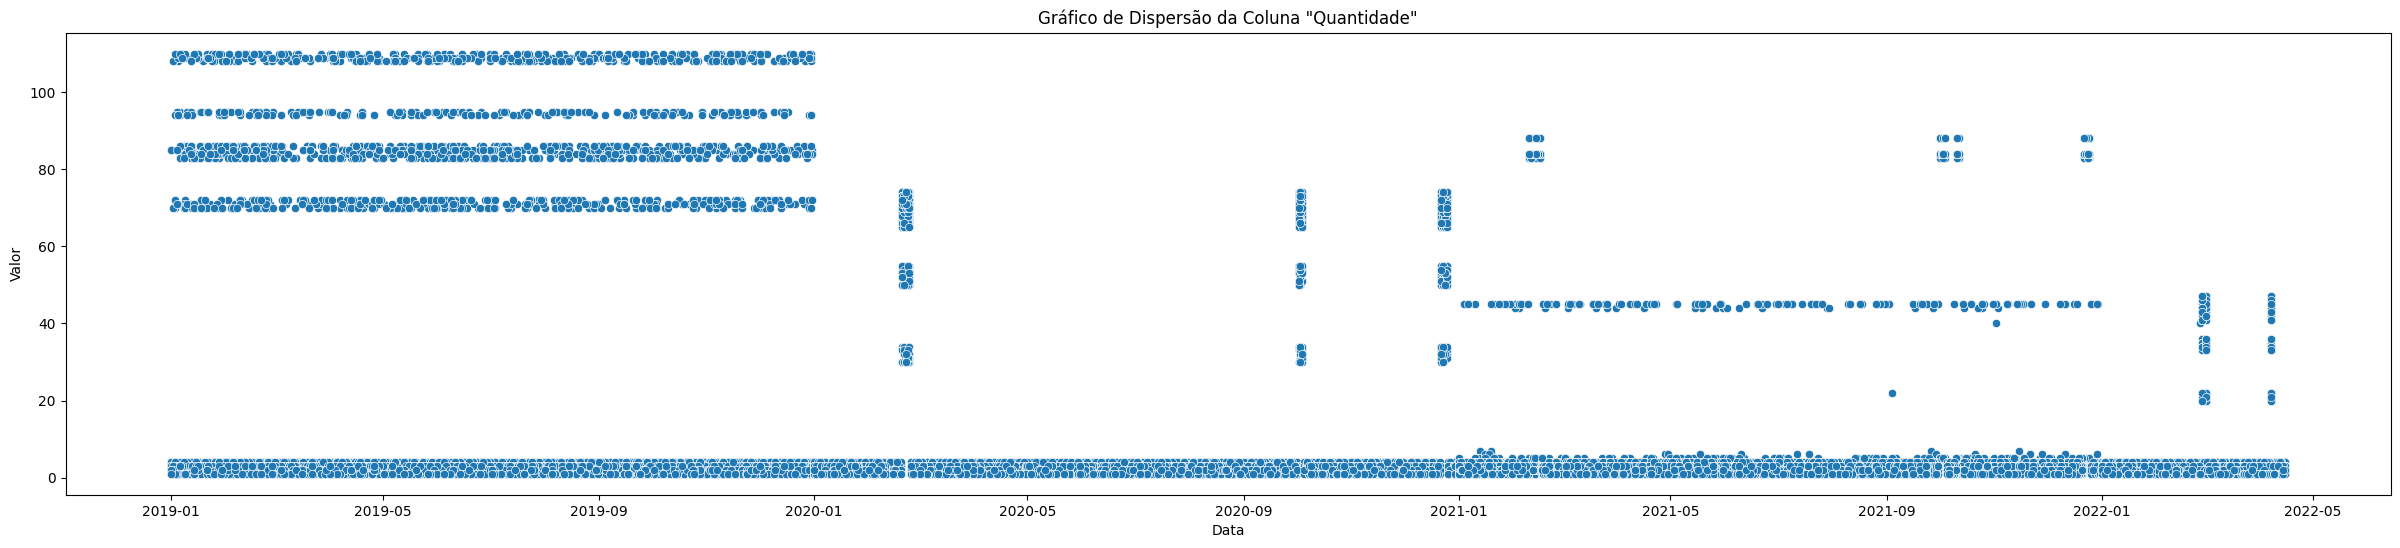

In [32]:
# Gráfico dispersão coluna QUANTIDADE
plt.figure(figsize=(30, 6))
sns.scatterplot(x=df_geral["data"], y=df_geral['quantidade'])
plt.title('Gráfico de Dispersão da Coluna "Quantidade"')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()

Ao obserar os gráficos, pudemos notas que existe uma correlação entre os dados da coluna 'lucro_liquido' e 'valor_comissao'.

Outra coisa que podemos identificar, é a presença de outliers nos gráficos que apresentam valores dispersos. Por isso, iremos avaliar e tratar, para cada coluna, os outliers.

### Em busca dos outliers

Utilizaremos o módulo sklearn para tratamento dos outliers das colunas mencionadas no tópico anterior

In [33]:
#Aplicação
from sklearn.preprocessing import scale
from sklearn.covariance import EmpiricalCovariance, MinCovDet

df_geral['outliers_vtb'] = scale(df_geral['valor_total_bruto'])
df_geral['outliers_qtd'] = scale(df_geral['quantidade'])
df_geral['outliers_comissao'] = scale(df_geral['valor_comissao'])
df_geral['outliers_lucro'] = scale(df_geral['lucro_liquido'])
df_geral['outliers_valor'] = scale(df_geral['valor'])

Adicionaremos uma coluna de outlier para cada coluna que aparece no tópico "Observando se existe valores outliers".

In [34]:
df_geral.columns

Index(['cod_pedido', 'regiao_pais', 'produto', 'valor', 'quantidade',
       'valor_total_bruto', 'data', 'estado', 'formapagto',
       'centro_distribuicao', 'responsavelpedido', 'valor_comissao',
       'lucro_liquido', 'categoriaprod', 'outliers_vtb', 'outliers_qtd',
       'outliers_comissao', 'outliers_lucro', 'outliers_valor'],
      dtype='object')

In [35]:
df_geral.head(5)

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod,outliers_vtb,outliers_qtd,outliers_comissao,outliers_lucro,outliers_valor
0,1,Norte,Biscoito True Champion 300g,22.0,2.0,44.0,2019-06-13,Acre,Dinheiro,Rapid Pink,Carlos,0.44,17.6,Alimentação,-0.036906,-0.136877,-0.083488,-0.140885,-0.413870
1,2,Norte,Biscoito True Champion 300g,21.0,2.0,42.0,2019-01-03,Amapá,Pix,Rapid Pink,Maria Linda,0.42,16.8,Alimentação,-0.037101,-0.136877,-0.083616,-0.141840,-0.418516
2,3,Norte,Biscoito True Champion 300g,22.0,2.0,44.0,2019-01-18,Pará,Boleto Bancário,Rapid Pink,Julia,0.88,35.2,Alimentação,-0.036906,-0.136877,-0.080668,-0.119879,-0.413870
3,4,Norte,Biscoito True Champion 300g,19.0,4.0,88.0,2019-08-19,Rondônia,Boleto Bancário,Rapid Pink,Yuri,0.76,30.4,Alimentação,-0.032599,0.029347,-0.081437,-0.125608,-0.427807
4,5,Norte,Biscoito True Champion 300g,22.0,2.0,44.0,2019-10-18,Tocantins,Cartão Crédito,Rapid Pink,Dolores,0.44,17.6,Alimentação,-0.036906,-0.136877,-0.083488,-0.140885,-0.413870


Esse df acima é o novo dataframe com as novas colunas, que filtram apenas os outliers para podermos fazer uma comparação de coluna em coluna.

#### Comparando 'valor_total_bruto':

In [36]:
#Utilizando métricas descritivas
df_geral[['valor_total_bruto', 'outliers_vtb']].describe()

,valor_total_bruto,outliers_vtb
count,2.007860e+05,2.007860e+05
mean,4.210743e+02,-7.957890e-18
std,1.021727e+04,1.000002e+00
min,1.000000e+00,-4.111424e-02
25%,3.600000e+01,-3.768866e-02
50%,6.700000e+01,-3.465457e-02
75%,1.276800e+02,-2.871559e-02
max,3.456346e+06,3.382443e+02


#### Comparando 'quantidade':

In [37]:
#Utilizando métricas descritivas
df_geral[['quantidade', 'outliers_qtd']].describe()

,quantidade,outliers_qtd
count,200786.000000,2.007860e+05
mean,3.646898,-3.991773e-17
std,12.031988,1.000002e+00
min,1.000000,-2.199889e-01
25%,1.000000,-2.199889e-01
50%,1.000000,-2.199889e-01
75%,2.000000,-1.368769e-01
max,110.000000,8.839218e+00


#### Comparando 'valor_comissao':

In [38]:
#Utilizando métricas descritivas
df_geral[['valor_comissao', 'outliers_comissao']].describe()

,valor_comissao,outliers_comissao
count,200786.000000,2.007860e+05
mean,13.466568,-3.199081e-17
std,156.029870,1.000002e+00
min,0.100000,-8.566694e-02
25%,0.660000,-8.207787e-02
50%,1.360000,-7.759154e-02
75%,3.800000,-6.195347e-02
max,6837.600000,4.373618e+01


#### Comparando 'lucro_liquido':

In [39]:
#Utilizando métricas descritivas
df_geral[['lucro_liquido', 'outliers_lucro']].describe()

,lucro_liquido,outliers_lucro
count,200786.000000,2.007860e+05
mean,135.640172,6.992681e-17
std,837.850280,1.000002e+00
min,1.500000,-1.601008e-01
25%,16.640000,-1.420307e-01
50%,25.600000,-1.313366e-01
75%,54.400000,-9.696288e-02
max,29304.000000,3.481342e+01


#### Comparando 'valor':

In [40]:
#Utilizando métricas descritivas
df_geral[['valor', 'outliers_valor']].describe()

,valor,outliers_valor
count,200786.000000,2.007860e+05
mean,111.089038,1.585385e-17
std,215.258883,1.000002e+00
min,5.000000,-4.928452e-01
25%,28.000000,-3.859968e-01
50%,42.560000,-3.183572e-01
75%,85.000000,-1.211987e-01
max,1441.800000,6.181925e+00


### Filtrando apenas os outliers:

In [41]:
df_geral.sort_values('outliers_vtb', ascending = False).head(5)

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod,outliers_vtb,outliers_qtd,outliers_comissao,outliers_lucro,outliers_valor
838,151419,Nordeste,Suplemento Alimentar Glutamina Mundo Animal Nu...,59.94,1.0,3456346.0,2022-01-25,Ceará,Boleto Bancário,Gold Beach,Neide,1.48,20.35,Medicamento,338.244297,-0.219989,-0.076822,-0.137603,-0.237617
8,150589,Centro Oeste,Biscoito True Champion 300g,42.12,2.0,2534234.0,2022-04-14,Mato Grosso,Boleto Bancário,Grãos Blue,Andressa,0.52,20.80,Alimentação,247.993747,-0.136877,-0.082975,-0.137066,-0.320401
1697,1698,Nordeste,Biscoito True Champion 300g,20.00,2.0,456546.0,2019-05-15,Maranhão,Cartão Débito,Gold Beach,Clarice,0.80,16.00,Alimentação,44.642652,-0.136877,-0.081181,-0.142795,-0.423161
1752,1753,Sudeste,Cama média almofadada Pity,52.00,1.0,456456.0,2019-04-11,Minas Gerais,Boleto Bancário,Papa Léguas,Monique,0.49,29.40,Acessório,44.633844,-0.219989,-0.083167,-0.126801,-0.274503
1622,1623,Nordeste,Meias esportivas para cães para ambientes inte...,33.00,1.0,456456.0,2019-04-30,Maranhão,Cartão Débito,Gold Beach,Clarice,1.32,13.20,Acessório,44.633844,-0.219989,-0.077848,-0.146136,-0.362769


In [42]:
df_geral.sort_values('outliers_qtd', ascending = False).head(5)

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod,outliers_vtb,outliers_qtd,outliers_comissao,outliers_lucro,outliers_valor
21582,21583,Sul,Penas Gatito,16.0,110.0,1760.0,2019-11-19,Rio Grande do Sul,Boleto Bancário,Tree True,Vivian,18.7,1346.4,Brinquedo,0.131046,8.839218,0.033541,1.445083,-0.441744
20204,20205,Sudeste,Pote Petisco Para Cachorro Bifinho Sabor Carne...,36.0,110.0,3960.0,2019-02-25,Espírito Santo,Cartão Crédito,Papa Léguas,Tereza,162.8,1628.0,Petisco,0.346368,8.839218,0.957085,1.781182,-0.348832
26855,26856,Sul,Cama Coração Coroa Pet Nest Almofada Lavável,91.0,110.0,10010.0,2019-12-18,Paraná,Dinheiro,Tree True,Beatriz,539.0,6468.0,Acessório,0.938504,8.839218,3.368168,7.557884,-0.093325
20364,20365,Norte,Penas Gatito,18.0,110.0,1980.0,2019-02-09,Amazonas,Boleto Bancário,Rapid Pink,Silvia,16.5,1188.0,Brinquedo,0.152578,8.839218,0.019441,1.256027,-0.432453
25241,25242,Centro Oeste,Roupa para Cão Billaboard,36.0,110.0,3960.0,2019-10-07,Mato Grosso,Cartão Débito,Grãos Blue,Andressa,141.9,2601.5,Acessório,0.346368,8.839218,0.823136,2.943087,-0.348832


In [43]:
df_geral.sort_values('outliers_comissao', ascending = False).head(5)

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod,outliers_vtb,outliers_qtd,outliers_comissao,outliers_lucro,outliers_valor
18847,18848,Nordeste,Nutri Alimentador Inteligente Automático Câmer...,770.0,110.0,84700.0,2019-07-01,Maranhão,Dinheiro,Gold Beach,Clarice,6837.60,29304.0,Bebedouros e Comedouros,8.248694,8.839218,43.736180,34.813419,3.061024
26641,26642,Centro Oeste,Nutri Alimentador Inteligente Automático Câmer...,848.0,110.0,93280.0,2019-04-23,Mato Grosso,Dinheiro,Grãos Blue,Andressa,6806.80,29172.0,Bebedouros e Comedouros,9.088450,8.839218,43.538781,34.655872,3.423379
24233,24234,Norte,Nutri Alimentador Inteligente Automático Câmer...,780.0,109.0,85020.0,2019-01-29,Acre,Cartão Crédito,Rapid Pink,Carlos,6706.77,28743.3,Bebedouros e Comedouros,8.280013,8.756106,42.897684,34.144204,3.107480
20646,20647,Nordeste,Nutri Alimentador Inteligente Automático Câmer...,794.0,109.0,86546.0,2019-08-30,Ceará,Pix,Gold Beach,Neide,6691.51,28677.9,Bebedouros e Comedouros,8.429369,8.756106,42.799882,34.066147,3.172518
21843,21844,Centro Oeste,Nutri Alimentador Inteligente Automático Câmer...,795.0,110.0,87450.0,2019-01-21,Distrito Federal,Cartão Débito,Grãos Blue,Lucia,6645.10,28479.0,Bebedouros e Comedouros,8.517846,8.839218,42.502439,33.828753,3.177163


In [44]:
df_geral.sort_values('outliers_lucro', ascending = False).head(5)

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod,outliers_vtb,outliers_qtd,outliers_comissao,outliers_lucro,outliers_valor
18847,18848,Nordeste,Nutri Alimentador Inteligente Automático Câmer...,770.0,110.0,84700.0,2019-07-01,Maranhão,Dinheiro,Gold Beach,Clarice,6837.60,29304.0,Bebedouros e Comedouros,8.248694,8.839218,43.736180,34.813419,3.061024
26641,26642,Centro Oeste,Nutri Alimentador Inteligente Automático Câmer...,848.0,110.0,93280.0,2019-04-23,Mato Grosso,Dinheiro,Grãos Blue,Andressa,6806.80,29172.0,Bebedouros e Comedouros,9.088450,8.839218,43.538781,34.655872,3.423379
24233,24234,Norte,Nutri Alimentador Inteligente Automático Câmer...,780.0,109.0,85020.0,2019-01-29,Acre,Cartão Crédito,Rapid Pink,Carlos,6706.77,28743.3,Bebedouros e Comedouros,8.280013,8.756106,42.897684,34.144204,3.107480
20646,20647,Nordeste,Nutri Alimentador Inteligente Automático Câmer...,794.0,109.0,86546.0,2019-08-30,Ceará,Pix,Gold Beach,Neide,6691.51,28677.9,Bebedouros e Comedouros,8.429369,8.756106,42.799882,34.066147,3.172518
21843,21844,Centro Oeste,Nutri Alimentador Inteligente Automático Câmer...,795.0,110.0,87450.0,2019-01-21,Distrito Federal,Cartão Débito,Grãos Blue,Lucia,6645.10,28479.0,Bebedouros e Comedouros,8.517846,8.839218,42.502439,33.828753,3.177163


In [45]:
df_geral.sort_values('outliers_valor', ascending = False).head(5)

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod,outliers_vtb,outliers_qtd,outliers_comissao,outliers_lucro,outliers_valor
20157,170738,Centro Oeste,Nutri Alimentador Inteligente Automático Câmer...,1441.8,1.0,1441.8,2022-02-17,Goiás,Boleto Bancário,Grãos Blue,Maria Clara,55.02,235.8,Bebedouros e Comedouros,0.099902,-0.219989,0.266318,0.119544,6.181925
28563,179144,Nordeste,Nutri Alimentador Inteligente Automático Câmer...,1441.8,36.0,51904.8,2022-02-27,Ceará,Cartão Crédito,Gold Beach,Neide,2066.40,8856.0,Bebedouros e Comedouros,5.038905,2.688931,13.157343,10.408043,6.181925
35167,185748,Sudeste,Nutri Alimentador Inteligente Automático Câmer...,1441.8,1.0,1441.8,2022-02-17,Piauí,Cartão Crédito,Gold Beach,Cristian,59.57,255.3,Bebedouros e Comedouros,0.099902,-0.219989,0.295479,0.142818,6.181925
974,151555,Sul,Nutri Alimentador Inteligente Automático Câmer...,1441.8,1.0,1441.8,2022-01-14,Rio Grande do Sul,Cartão Débito,Tree True,Vivian,32.12,401.5,Bebedouros e Comedouros,0.099902,-0.219989,0.119551,0.317313,6.181925
40556,191137,Norte,Nutri Alimentador Inteligente Automático Câmer...,1441.8,1.0,1441.8,2022-03-20,Amazonas,Cartão Crédito,Rapid Pink,Silvia,62.30,267.0,Bebedouros e Comedouros,0.099902,-0.219989,0.312976,0.156782,6.181925


### Exibindo as colunas de outliers no formato de gráfico

<Axes: >

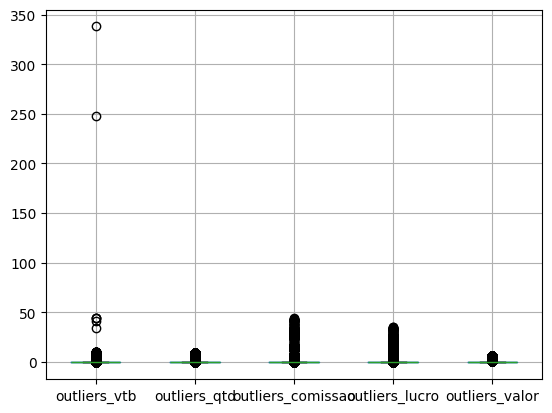

In [46]:
#Box Plot das colunas outliers 
df_geral[['outliers_vtb', 'outliers_qtd', 'outliers_comissao', 'outliers_lucro', 'outliers_valor']].boxplot()

### Tratando os outliers

Vamos utilizar do metódo de Winsorizar, para tratar os outliers identificados, que consiste em limitar ou "capar" os valores extremos de uma distribuição de dados.

#### Para coluna 'valor':

In [47]:
# Tratamento Valor
# 1º obtemos os quartis
wins_values_v = df_geral['valor'].quantile([0.05, 0.9]).to_list()

# Agora aplicamos os limites
df_geral['valor_wins'] = df_geral['valor'].clip(wins_values_v[0], wins_values_v[1])

# Por último vemos os dados como ficaram
df_geral[['valor', 'valor_wins']].head(10)

,valor,valor_wins
0,22.0,22.0
1,21.0,21.0
2,22.0,22.0
3,19.0,19.0
4,22.0,22.0
5,19.0,19.0
6,21.0,21.0
7,26.0,26.0
8,26.0,26.0
9,26.0,26.0


<Axes: >

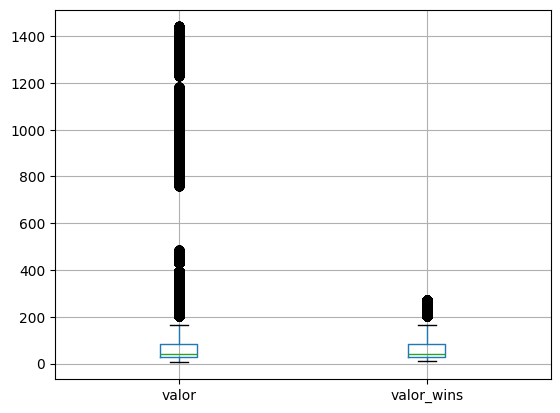

In [48]:
#Box Plot da coluna 'valor'
df_geral[['valor', 'valor_wins']].boxplot()

Aqui podemos observar, graficamente, a diferença entre "valor" e "valor_wins". \
valor_wins demonstra que ainda temos outliers porem foram minimizados consideravelmente!

**Agora iremos fazer o mesmo método para as colunas restantes!**

#### Para coluna 'quantidade':

In [49]:
# Tratamento Qntd
# obter os quartis
wins_values = df_geral['quantidade'].quantile([0.05, 0.9]).to_list()

# winsorizar
df_geral['qtd_wins'] = df_geral['quantidade'].clip(wins_values[0], wins_values[1])

# ver os dados
df_geral[['quantidade', 'qtd_wins']].head(10)

,quantidade,qtd_wins
0,2.0,2.0
1,2.0,2.0
2,2.0,2.0
3,4.0,3.0
4,2.0,2.0
5,4.0,3.0
6,3.0,3.0
7,2.0,2.0
8,2.0,2.0
9,4.0,3.0


<Axes: >

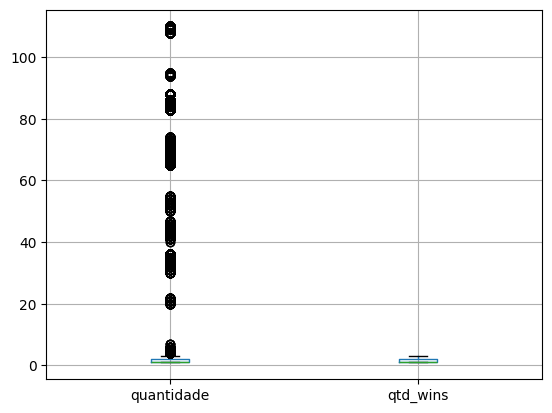

In [50]:
#Box Plot da coluna 'quantidade'
df_geral[['quantidade', 'qtd_wins']].boxplot()

Diferente do 'valor', na coluna 'quantidade' pudemos zerar os outliers com este método!

#### Para a coluna 'valor_total_bruto':

In [51]:
# Tratamento Valor_TT_Bruto
# obter os quartis
wins_values = df_geral['valor_total_bruto'].quantile([0.05, 0.95]).to_list()

# winsorizar
df_geral['valor_tt_wins'] = df_geral['valor_total_bruto'].clip(wins_values[0], wins_values[1])

# ver os dados
df_geral[['valor_tt_wins', 'valor_total_bruto']].head(10)

,valor_tt_wins,valor_total_bruto
0,44.0,44.0
1,42.0,42.0
2,44.0,44.0
3,88.0,88.0
4,44.0,44.0
5,76.0,76.0
6,63.0,63.0
7,52.0,52.0
8,52.0,52.0
9,104.0,104.0


<Axes: >

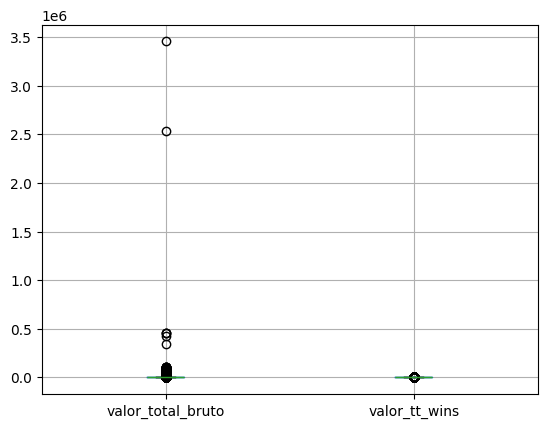

In [52]:
#Box Plot valor_tt
df_geral[['valor_total_bruto', 'valor_tt_wins']].boxplot()

Na coluna 'valor_total_bruto' minimizamos os outliers!

#### Para a coluna 'lucro_liquido':

In [53]:
# Tratamento Lucro_Liquido
# obter os quartis
wins_values = df_geral['lucro_liquido'].quantile([0.05, 0.9]).to_list()

# winsorizar
df_geral['lucro_wins'] = df_geral['lucro_liquido'].clip(wins_values[0], wins_values[1])

# ver os dados
df_geral[['lucro_liquido', 'lucro_wins']].head(10)

,lucro_liquido,lucro_wins
0,17.6,17.6
1,16.8,16.8
2,35.2,35.2
3,30.4,30.4
4,17.6,17.6
5,30.4,30.4
6,25.2,25.2
7,20.8,20.8
8,20.8,20.8
9,41.6,41.6


<Axes: >

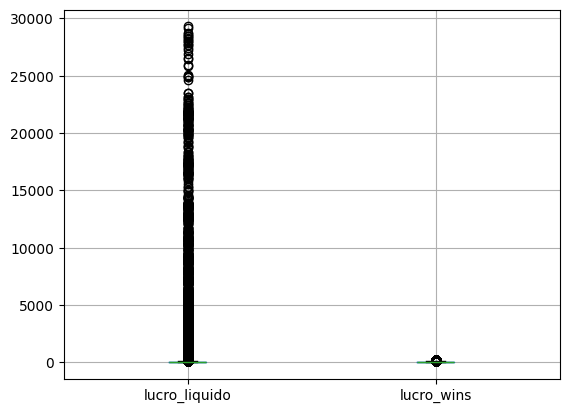

In [54]:
#Box Plot da coluna 'lucro_liquido':
df_geral[['lucro_liquido', 'lucro_wins']].boxplot()

A coluna de 'lucro_liquido' foi a que mais teve outliers, quando comparamos com o 'lucro_wins' vemos uma forte diferença.

#### Para coluna 'valor_comissao':

In [55]:
# Tratamento Comissao
# obter os quartis
wins_values = df_geral['valor_comissao'].quantile([0.05, 0.9]).to_list()

# winsorizar
df_geral['comissao_wins'] = df_geral['valor_comissao'].clip(wins_values[0], wins_values[1])

# ver os dados
df_geral[['valor_comissao', 'comissao_wins']].head(10)

,valor_comissao,comissao_wins
0,0.44,0.44
1,0.42,0.42
2,0.88,0.88
3,0.76,0.76
4,0.44,0.44
5,0.76,0.76
6,0.63,0.63
7,0.52,0.52
8,0.52,0.52
9,1.04,1.04


<Axes: >

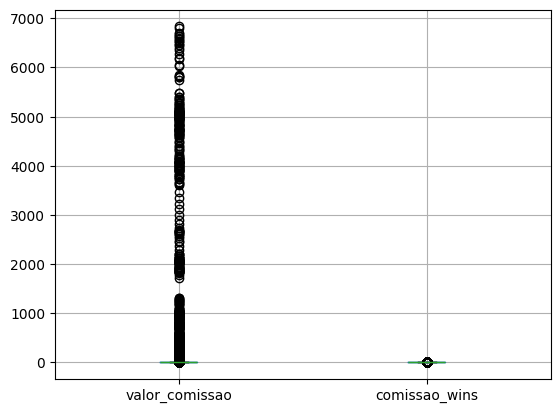

In [56]:
#Box Plot da coluna 'valor_comissao':
df_geral[['valor_comissao', 'comissao_wins']].boxplot()

Por último o valor_comissao, que também teve seus outliers minimizados!

## Variância e Desvio Padrão

In [57]:
# calculo de variancia e desvio padrão da tabela sem valores NaN
df_geral.groupby('data').agg(variancia = pd.NamedAgg('qtd_wins', 'var'), desvio_padrao = pd.NamedAgg('qtd_wins', 'std')).reset_index()

,data,variancia,desvio_padrao
0,2019-01-01,0.650039,0.806250
1,2019-01-02,0.550287,0.741813
2,2019-01-03,0.596566,0.772377
3,2019-01-04,0.678586,0.823763
4,2019-01-05,0.718290,0.847520
...,...,...,...
1196,2022-04-11,0.654480,0.809000
1197,2022-04-12,0.623789,0.789803
1198,2022-04-13,0.658401,0.811419
1199,2022-04-14,0.651589,0.807210


## Média de Preço Geral e por Região

In [58]:
# Média de preço Geral
df_geral['valor_wins'].mean()

np.float64(74.71845133624855)

In [59]:
# Calculo media de preço por região
df_geral.groupby('regiao_pais').agg(media = pd.NamedAgg('valor_wins', 'mean')).reset_index()

,regiao_pais,media
0,Centro Oeste,74.928175
1,Nordeste,74.737076
2,Norte,74.697168
3,Sudeste,74.669968
4,Sul,74.532072


In [60]:
df_geral.groupby('regiao_pais')['valor_wins'].mean().reset_index().assign(diferenca=lambda x: x['valor_wins'] - df_geral['valor_wins'].mean())

,regiao_pais,valor_wins,diferenca
0,Centro Oeste,74.928175,0.209724
1,Nordeste,74.737076,0.018624
2,Norte,74.697168,-0.021284
3,Sudeste,74.669968,-0.048483
4,Sul,74.532072,-0.186379


Todas apresentando uma diferença quando comparadas a média geral, sendo as regiões que mais apresentaram diferença: Sul e Centro-Oeste.

## Média de Preço Geral e por Modalidade de Pagamento

In [61]:
df_geral.columns

Index(['cod_pedido', 'regiao_pais', 'produto', 'valor', 'quantidade',
       'valor_total_bruto', 'data', 'estado', 'formapagto',
       'centro_distribuicao', 'responsavelpedido', 'valor_comissao',
       'lucro_liquido', 'categoriaprod', 'outliers_vtb', 'outliers_qtd',
       'outliers_comissao', 'outliers_lucro', 'outliers_valor', 'valor_wins',
       'qtd_wins', 'valor_tt_wins', 'lucro_wins', 'comissao_wins'],
      dtype='object')

In [62]:
# Média da população
df_geral['valor_wins'].mean()

np.float64(74.71845133624855)

In [63]:
# Calculo media de preço por pagamento
df_geral.groupby('formapagto').agg(media_por_formapagto = pd.NamedAgg('valor_wins', 'mean')).reset_index()

,formapagto,media_por_formapagto
0,Boleto Bancário,74.651968
1,Cartão Crédito,75.135193
2,Cartão Débito,74.088132
3,Dinheiro,74.866349
4,Pix,74.846515


In [64]:
#calculado a diferença entre cada método e a média total
df_geral.groupby('formapagto')['valor_wins'].mean().reset_index().assign(diferenca=lambda x: x['valor_wins'] - df_geral['valor_wins'].mean())

,formapagto,valor_wins,diferenca
0,Boleto Bancário,74.651968,-0.066483
1,Cartão Crédito,75.135193,0.416742
2,Cartão Débito,74.088132,-0.630319
3,Dinheiro,74.866349,0.147897
4,Pix,74.846515,0.128064


Todos apresentando uma diferença quando comparadas a média geral, sendo os formatos que mais apresentaram diferença: Cartão de Débito e Cartão de Crédito.

## Calculando a matriz de correlação dos dados fornecidos

### Perguntas à serem respondidas:

- Quais as variáveis que apresentam forte correlação positiva ou negativa?

- Acrescente a matriz de correlação como uma imagem e anexe-a ao seu relatório.

### Deixando a correlaçao mais visível

In [65]:
df_correlacao = df_geral.select_dtypes(include=['number']).corr()
df_correlacao

,cod_pedido,valor,quantidade,valor_total_bruto,valor_comissao,lucro_liquido,outliers_vtb,outliers_qtd,outliers_comissao,outliers_lucro,outliers_valor,valor_wins,qtd_wins,valor_tt_wins,lucro_wins,comissao_wins
cod_pedido,1.000000,0.091924,-0.041248,0.001239,-0.013924,-0.024483,0.001239,-0.041248,-0.013924,-0.024483,0.091924,0.106816,0.002013,0.075676,-0.000030,-0.001102
valor,0.091924,1.000000,-0.011862,0.061931,0.213175,0.191428,0.061931,-0.011862,0.213175,0.191428,1.000000,0.793933,-0.109851,0.736346,0.713660,0.706445
quantidade,-0.041248,-0.011862,1.000000,0.121061,0.322254,0.559771,0.121061,1.000000,0.322254,0.559771,-0.011862,-0.009694,0.338288,0.501061,0.422690,0.413450
valor_total_bruto,0.001239,0.061931,0.121061,1.000000,0.264352,0.262433,1.000000,0.121061,0.264352,0.262433,0.061931,0.053157,0.036673,0.100596,0.072480,0.070619
valor_comissao,-0.013924,0.213175,0.322254,0.264352,1.000000,0.888694,0.264352,0.322254,1.000000,0.888694,0.213175,0.157064,0.085920,0.221981,0.191121,0.188196
lucro_liquido,-0.024483,0.191428,0.559771,0.262433,0.888694,1.000000,0.262433,0.559771,0.888694,1.000000,0.191428,0.200704,0.172549,0.364288,0.319272,0.311348
outliers_vtb,0.001239,0.061931,0.121061,1.000000,0.264352,0.262433,1.000000,0.121061,0.264352,0.262433,0.061931,0.053157,0.036673,0.100596,0.072480,0.070619
outliers_qtd,-0.041248,-0.011862,1.000000,0.121061,0.322254,0.559771,0.121061,1.000000,0.322254,0.559771,-0.011862,-0.009694,0.338288,0.501061,0.422690,0.413450
outliers_comissao,-0.013924,0.213175,0.322254,0.264352,1.000000,0.888694,0.264352,0.322254,1.000000,0.888694,0.213175,0.157064,0.085920,0.221981,0.191121,0.188196
outliers_lucro,-0.024483,0.191428,0.559771,0.262433,0.888694,1.000000,0.262433,0.559771,0.888694,1.000000,0.191428,0.200704,0.172549,0.364288,0.319272,0.311348


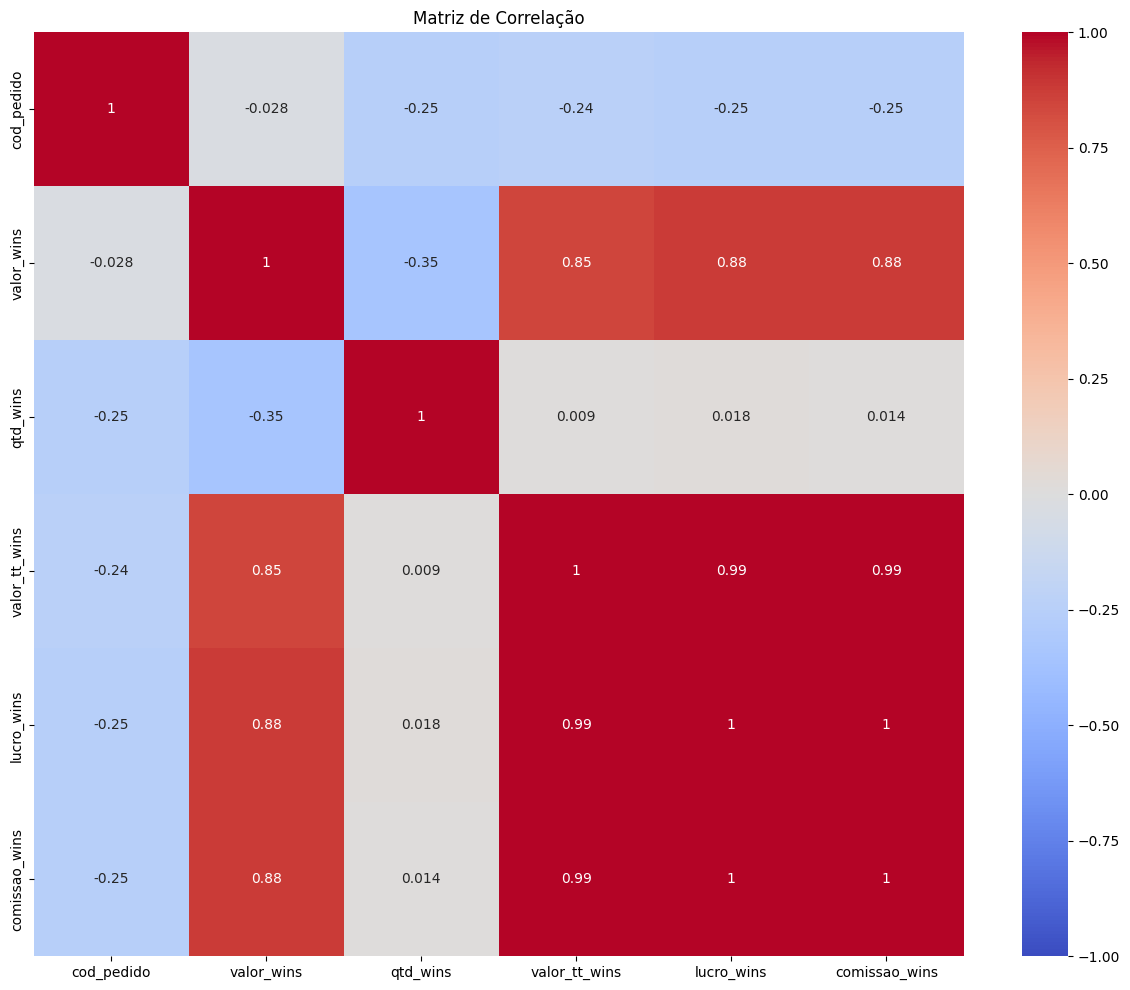

In [66]:
plt.figure(figsize=(15, 12))
# Selecionando as colunas desejadas para a correlação
colunas = ['cod_pedido', 'valor_wins', 'qtd_wins', 'valor_tt_wins', 'lucro_wins', 'comissao_wins']
# Calculando a matriz de correlação apenas para essas colunas
df_correlacao_selecionada = df_correlacao[colunas].corr()

# Plotando o heatmap
sns.heatmap(df_correlacao_selecionada, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

### Resposta:

As variáveis que apresentam forte correlação positiva, são as tonalidade mais avermelhadas, sendo a maior correlação a comissão_wins e lucro_wins. 

Já as variáveis que apresentam forte correlação negativa, são as de tonalidade mais azuladas, sendo a menor correlação a qtd_wins e valor_wins.

**Insights:**
- O lucro_wins e comissao_wins estão diretamente relacionadas, o que indica que a comissão pode ser calculada como uma porcentagem do lucro. Isso faz sentido, pois, se usarmos a lógica, quanto maisa vendas, maior o lucro e maior a comissão.
- O valor_wins parcece ser um bom indicador para valor_total_wins, lucro_wins e comissao_wins.
- Na negativa, podemos apontar a correlação entre oferta e demanda, ou seja, uma correlação linear entre quantidade e valor, quanto maior quantidade daquele produto, menor o valor dele.

## Matriz de Correlação de Outliers

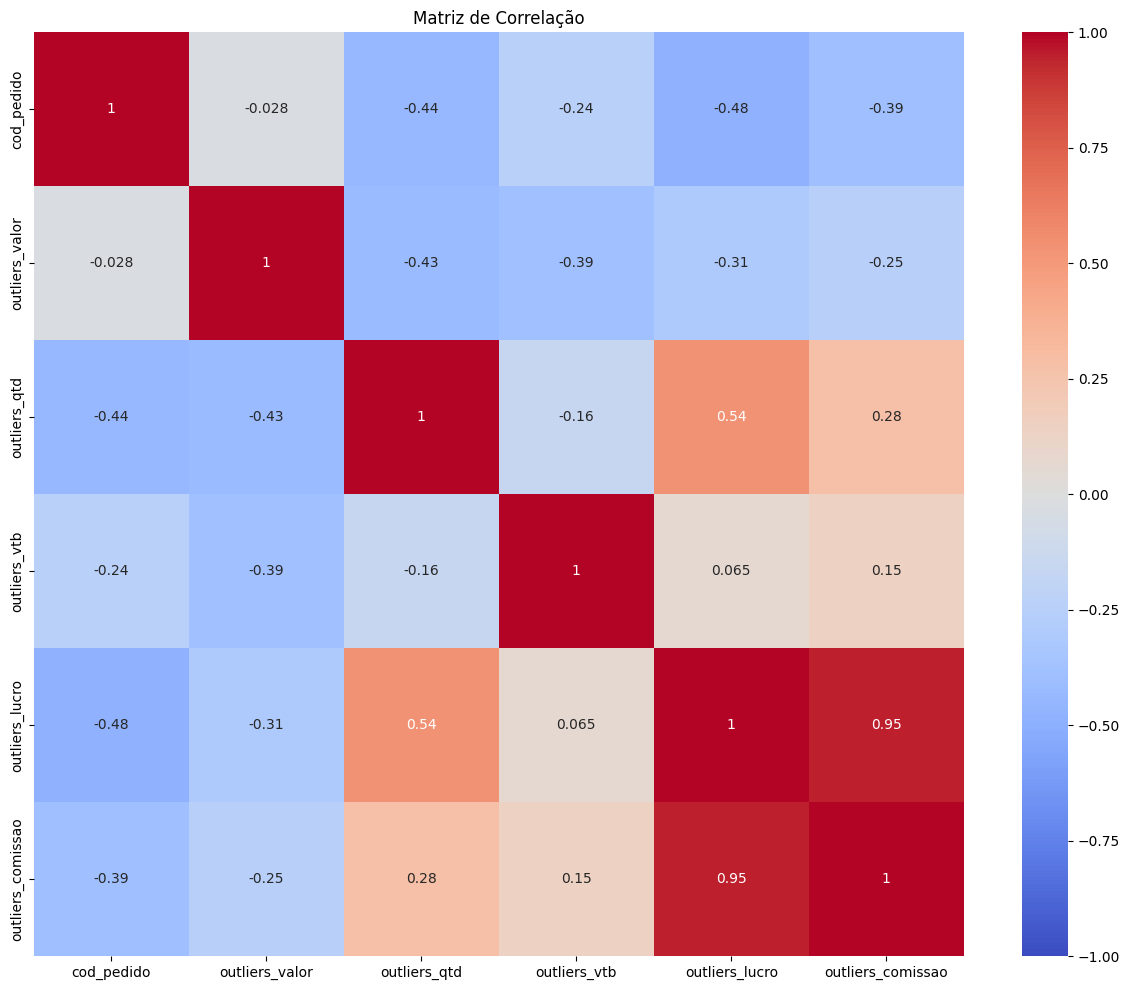

In [67]:
plt.figure(figsize=(15, 12))
# Selecionando as colunas desejadas para a correlação
colunas2 = ['cod_pedido', 'outliers_valor', 'outliers_qtd', 'outliers_vtb', 'outliers_lucro', 'outliers_comissao']
# Calculando a matriz de correlação apenas para essas colunas
df_correlacao_selecionada2 = df_correlacao[colunas2].corr()

# Plotando o heatmap
sns.heatmap(df_correlacao_selecionada2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

Com essa matriz, conseguimos observar a correlação entre os valores de outliers.